# unit 2 project notebook
<br>Dataset: speed dating dataset
<br>Author: Ray Fisman and Sheena Iyengar.
Source: [Columbia Business School](http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/) - 2004
<br>Drop down to view data dictionary.

data dictionary:
<br>
* gender: Gender of self
* age: Age of self
* age_o: Age of partner
* d_age: Difference in age
* race: Race of self
* race_o: Race of partner
* samerace: Whether the two persons have the same race or not.
* importance_same_race: How important is it that partner is of same race?
* importance_same_religion: How important is it that partner has same religion?
* field: Field of study
* pref_o_attractive: How important does partner rate attractiveness
* pref_o_sinsere: How important does partner rate sincerity
* pref_o_intelligence: How important does partner rate intelligence
* pref_o_funny: How important does partner rate being funny
* pref_o_ambitious: How important does partner rate ambition
* pref_o_shared_interests: How important does partner rate having shared interests
* attractive_o: Rating by partner (about me) at night of event on attractiveness
* sincere_o: Rating by partner (about me) at night of event on sincerity
* intelligence_o: Rating by partner (about me) at night of event on intelligence
* funny_o: Rating by partner (about me) at night of event on being funny
* ambitous_o: Rating by partner (about me) at night of event on being ambitious
* shared_interests_o: Rating by partner (about me) at night of event on shared interest
* attractive_important: What do you look for in a partner - attractiveness
* sincere_important: What do you look for in a partner - sincerity
* intellicence_important: What do you look for in a partner - intelligence
* funny_important: What do you look for in a partner - being funny
* ambtition_important: What do you look for in a partner - ambition
* shared_interests_important: What do you look for in a partner - shared interests
* attractive: Rate yourself - attractiveness
* sincere: Rate yourself - sincerity
* intelligence: Rate yourself - intelligence
* funny: Rate yourself - being funny
* ambition: Rate yourself - ambition
* attractive_partner: Rate your partner - attractiveness
* sincere_partner: Rate your partner - sincerity
* intelligence_partner: Rate your partner - intelligence
* funny_partner: Rate your partner - being funny
* ambition_partner: Rate your partner - ambition
* shared_interests_partner: Rate your partner - shared interests
* sports: Your own interests [1-10]
* tvsports
* exercise
* dining
* museums
* art
* hiking
* gaming
* clubbing
* reading
* tv
* theater
* movies
* concerts
* music
* shopping
* yoga
* interests_correlate: Correlation between participant’s and partner’s ratings of interests.
* expected_happy_with_sd_people: How happy do you expect to be with the people you meet during the speed-dating event?
* expected_num_interested_in_me: Out of the 20 people you will meet, how many do you expect will be interested in dating you?
* expected_num_matches: How many matches do you expect to get?
* like: Did you like your partner?
* guess_prob_liked: How likely do you think it is that your partner likes you?
* met: Have you met your partner before?
* decision: Decision at night of event.
* decision_o: Decision of partner at night of event.
* match: Match (yes/no)

# Data wrangling work

In [126]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 75)
pd.set_option("display.max_rows", 250)

In [2]:
def subfield(x):
    if ('engineer' in x) or ('electri' in x):
        x = 'engineer'
    elif ('finan' in x) or ('market' in x):
        x = 'finance'
    elif ('literature' in x) or ('english' in x) or ('polish' in x) or ('french' in x):
        x = 'literacture/language'
    elif ('writing' in x) or ('jour' in x):
        x = 'writing/journalism'
    elif 'history' in x:
        x = 'history'
    elif 'mba' in x:
        x = 'mba'
    elif ('bio' in x) or ('neuro' in x) or ('genetic' in x):
        x = 'biology/biotech/neurology'
    elif 'psychology' in x:
        x = 'psychology'
    elif 'mfa' in x:
        x = 'mfa'
    elif 'sipa' in x:
        x = 'sipa'
    elif ('education' in x) or ('teach' in x):
        x = 'education'
    elif ('math' in x) or ('stat' in x) or('quant' in x) or ('operation' in x):
        x = 'mathematics/statistics'
    elif 'philo' in x:
        x = 'philosophy'
    elif 'busine' in x:
        x = 'business'
    elif 'econo' in x:
        x = 'economics'
    elif 'law' in x:
        x = 'law'
    elif 'patho' in x:
        x = 'speech pathology'
    elif 'religion' in x:
        x = 'religion'
    elif ('interna' in x) or ('sipa' in x):
        x = 'international affairs'
    elif 'media' in x:
        x = 'tech and media'
    elif ('medic' in x) or ('epide' in x):
        x = 'medicine/medical science'
    elif ('clim' in x) or ('envi' in x) or ('ecology' in x):
        x = 'climate'
    elif 'nut' in x:
        x = 'nutrition'
    elif 'americ' in x:
        x = 'american studies'
    elif ('admin' in x) or ('policy' in x):
        x = 'administration'
    elif 'health' in x:
        x = 'health'
    elif ('thea' in x) or ('acting' in x):
        x = 'theater'
    elif ('gs' in x) or ('teso' in x) or ('qmss' in x) or ('marine' in x) or ('fund' in x) or ('money' in x) or ('working' in x):
        x = 'other'
    elif 'physics' in x:
        x = 'physics'
    elif 'anthro' in x:
        x = 'anthropology'
    elif ('soci' in x) or ('human' in x) or ('communi' in x) or ('consul' in x):
        x = 'sociology/social work'
    return x

In [3]:
def wrangle(filepath):
    df = pd.read_csv(filepath, na_values='?')

    #clean up some string formatting
    df['field'] = df['field'].str.strip("'").str.lower()
    df['race'] = df['race'].str.strip("'")
    df['race_o'] = df['race_o'].str.strip("'")

    #drop the column with excessive NaNs
    df = df.drop(columns = ['expected_num_interested_in_me', 'expected_num_matches'])

    #drop NaN rows
    df = df.dropna()
    
    #organize the field column
    df['field'] = df['field'].apply(subfield)

    #drop abnormal values in 'met'
    df = df.drop(df[df['met'] > 1.0].index.to_list(), axis = 0)
    
    return df

In [4]:
general_df = wrangle('speeddating_raw.csv')
general_df.head()

,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match
0,female,21.0,27.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,law,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,6.0,0.0,1,0,0
1,female,21.0,22.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,5.0,1.0,1,0,0
3,female,21.0,23.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,law,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,6.0,0.0,1,1,1
4,female,21.0,24.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,2.0,4.0,law,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,6.0,6.0,0.0,1,1,1
5,female,21.0,25.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,law,50.0,0.0,30.0,10.0,0.0,10.0,7.0,7.0,8.0,8.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,4.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,6.0,5.0,0.0,0,1,0


In [5]:
# general_df['field'] = general_df['field'].str.strip("'").str.title()
# general_df['race'] = general_df['race'].str.strip("'")
# general_df['race_o'] = general_df['race_o'].str.strip("'")

In [6]:
# general_df.isnull().sum()

In [7]:
# general_df['field'].apply(subfield).value_counts()

In [8]:
# general_df['match'].value_counts(normalize = True)

## Classfication (Random Forest)

In [5]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
X = general_df.drop(columns = ['decision', 'decision_o', 'match'])
y = general_df['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print("baseline accuracy:", y_train.value_counts(normalize = True).max())

baseline accuracy: 0.8255451713395638


In [7]:
model_general_rf = make_pipeline(
    OrdinalEncoder(), 
    RandomForestClassifier(n_jobs=-1, max_depth=26, n_estimators=400, random_state=42)
).fit(X_train, y_train)

In [8]:
print("train score:", model_general_rf.score(X_train, y_train))
print("test score:", model_general_rf.score(X_test, y_test))

train score: 1.0
test score: 0.8407473309608541


The naive model without any indepth engineering still beats the baseline.

In [9]:
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance

In [10]:
model_general_xgb = make_pipeline(
    OrdinalEncoder(), 
    XGBClassifier(
        n_jobs = -1,
        random_state = 42
    )
)

model_general_xgb.fit(X_train, y_train);

D:\conda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [11]:
print("XGB train score:", model_general_xgb.score(X_train, y_train))
print("XGB test score:", model_general_xgb.score(X_test, y_test))

XGB train score: 1.0
XGB test score: 0.8505338078291815


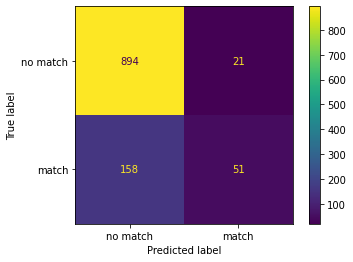

In [12]:
plot_confusion_matrix(
    model_general_rf, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
)

In [13]:
print(classification_report(y_test, model_general_rf.predict(X_test), target_names=['no match', 'match']))

              precision    recall  f1-score   support

    no match       0.85      0.98      0.91       915
       match       0.71      0.24      0.36       209

    accuracy                           0.84      1124
   macro avg       0.78      0.61      0.64      1124
weighted avg       0.82      0.84      0.81      1124



According to the confusion matrix, the recall and f1 score are terrible for predicting match using this random forest model.
<br>What could be possible causes?

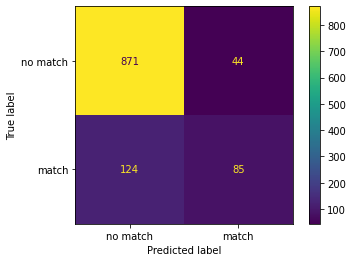

In [14]:
plot_confusion_matrix(
    model_general_xgb, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
)

In [15]:
print(classification_report(y_test, model_general_xgb.predict(X_test), target_names=['no match', 'match']))

              precision    recall  f1-score   support

    no match       0.88      0.95      0.91       915
       match       0.66      0.41      0.50       209

    accuracy                           0.85      1124
   macro avg       0.77      0.68      0.71      1124
weighted avg       0.84      0.85      0.84      1124



XBG model improved recall and f1-score for predicting 'match'

In [16]:
perm_imp = permutation_importance(
    model_general_xgb, 
    X_test, 
    y_test, 
    n_jobs = -1, 
    random_state=42
)

In [17]:
imps = pd.DataFrame(data = {'imp_mean': perm_imp['importances_mean']}, index = X_test.columns)
imps.head()

,imp_mean
gender,-0.001423
age,0.002135
age_o,-0.002847
race,0.001957
race_o,0.002491


Text(0.5, 1.0, 'most important features')

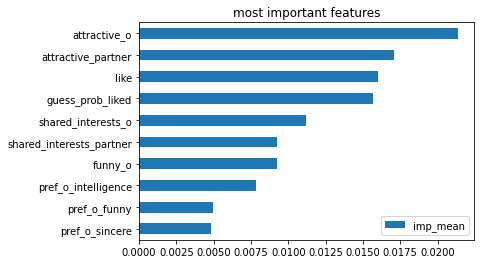

In [18]:
imps.sort_values(by = 'imp_mean').tail(10).plot(kind = 'barh')
plt.title('most important features')

Text(0.5, 1.0, 'least important features')

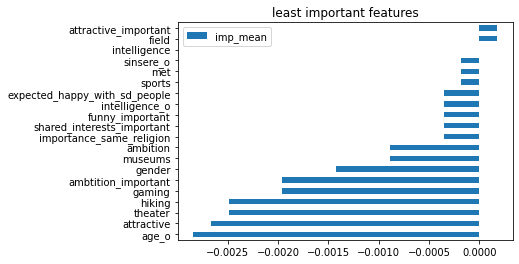

In [26]:
imps.sort_values(by = 'imp_mean').head(20).plot(kind = 'barh')
plt.title('least important features')

In [20]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

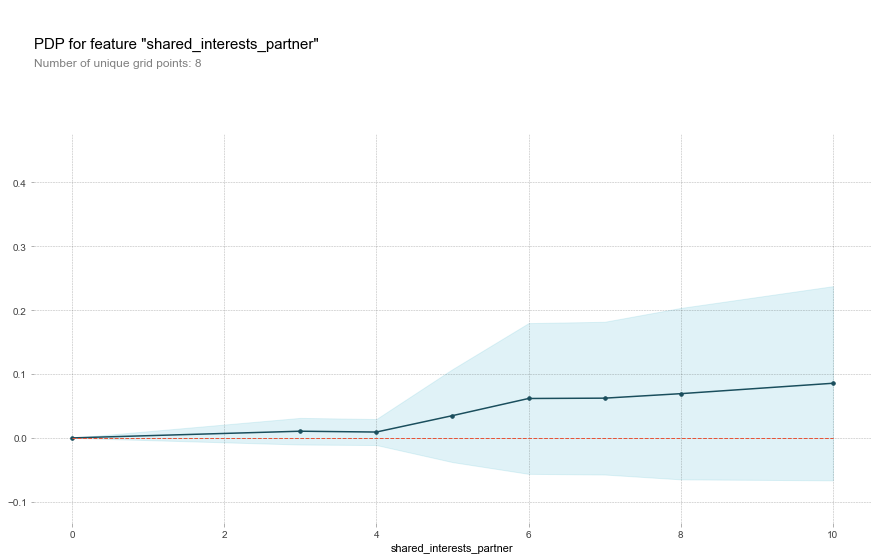

In [21]:
feature = 'shared_interests_partner'
isolate = pdp_isolate(model_general_xgb,
                      dataset=X_test,
                      model_features=X_test.columns,
                      feature=feature)

pdp_plot(isolate, feature_name=feature);

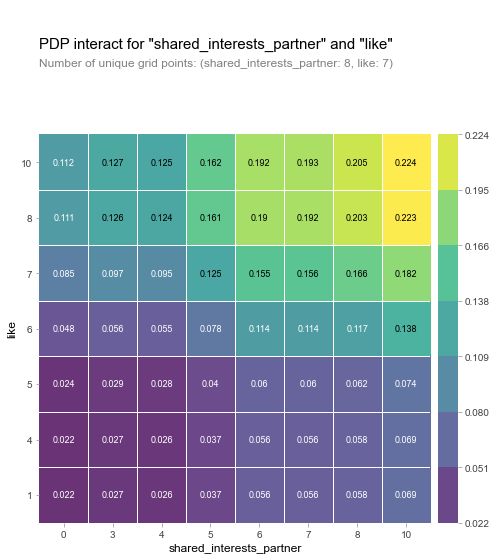

In [22]:
features = ['shared_interests_partner', 'like']

interact = pdp_interact(model_general_xgb, 
                        dataset=X_test, 
                        model_features=X_test.columns, 
                        features=features)

pdp_interact_plot(interact, plot_type='grid', feature_names=features);

In [36]:
# X_copy = X.copy()
# y_copy = y.copy()
# oe = OrdinalEncoder()
# oe.fit_transform(X_copy)
# X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size = 0.2, random_state=42)
# model = XGBClassifier(n_jobs = -1, random_state = 42)
# model.fit(X_train_copy, y_train_copy)

# import shap  # package used to calculate Shap values

# # Create object that can calculate shap values
# explainer = shap.TreeExplainer(model)

# # calculate shap values. This is what we will plot.
# # Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
# # row = X_test_copy.head(1)
# shap_values = explainer.shap_values(X_test_copy)

# # Make plot. Index of [1] is explained in text below.
# shap.summary_plot(shap_values, X_test_copy)

In [ ]:
# shap.initjs()
# shap.force_plot(
#     base_value=explainer.expected_value,
#     shap_values=shap_values,
#     features=row
# )

In [23]:
general_df.head()

,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match
0,female,21.0,27.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,law,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,6.0,0.0,1,0,0
1,female,21.0,22.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,5.0,1.0,1,0,0
3,female,21.0,23.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,law,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,6.0,0.0,1,1,1
4,female,21.0,24.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,2.0,4.0,law,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,6.0,6.0,0.0,1,1,1
5,female,21.0,25.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,law,50.0,0.0,30.0,10.0,0.0,10.0,7.0,7.0,8.0,8.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,4.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,6.0,5.0,0.0,0,1,0


In [64]:
# manually undersample df to balance the classes
X = general_df.drop(columns = ['decision', 'decision_o', 'match'])
y = general_df['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)
train = pd.concat([X_train, y_train],axis = 1)
# train['match'].value_counts()
undersample_0 = train[train['match'] == 0].sample(800)
undersample_1 = train[train['match'] == 1]
train_under = pd.concat([undersample_0, undersample_1], axis = 0)
# train_under['match'].value_counts()
X_under_train = train_under.drop(columns = ['match'])
y_under_train = train_under['match']

In [67]:
X_under_train.shape

(1739, 58)

In [68]:
model_under_xgb = make_pipeline(
    OrdinalEncoder(), 
    XGBClassifier(n_jobs = -1, random_state = 42)
).fit(X_under_train, y_under_train);


[12:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
print('train accuracy with undersampling:', model_under_xgb.score(X_under_train, y_under_train))
print('test accuracy with undersampling:', model_under_xgb.score(X_test, y_test))
print('-------------------------------------------------')
print(classification_report(y_test, model_under_xgb.predict(X_test), target_names=['no match', 'match']))

train accuracy with undersampling: 1.0
test accuracy with undersampling: 0.7829181494661922
-------------------------------------------------
              precision    recall  f1-score   support

    no match       0.96      0.77      0.85       228
       match       0.46      0.85      0.60        53

    accuracy                           0.78       281
   macro avg       0.71      0.81      0.72       281
weighted avg       0.86      0.78      0.80       281



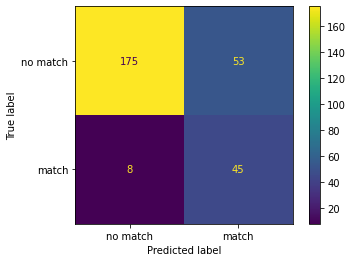

In [70]:
plot_confusion_matrix(
    model_under_xgb, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

Use over-sample method to fix the imbalanced class issue in training dataset

In [38]:
# general_df = general_df.drop(general_df[general_df['met'] > 1.0].index.to_list(), axis = 0)
X = general_df.drop(columns = ['decision', 'decision_o', 'match'])
y = general_df['match']

In [40]:
oe = OrdinalEncoder()
X = oe.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)

In [48]:
y_sm_train.value_counts(normalize = True)

0    0.5
1    0.5
Name: match, dtype: float64

In [44]:
model_sm_xgb = XGBClassifier(n_jobs = -1, random_state = 42).fit(X_sm_train, y_sm_train);


[11:23:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
print('SMOTE train accuracy:', model_sm_xgb.score(X_sm_train, y_sm_train))
print('SMOTE test accuracy:', model_sm_xgb.score(X_test, y_test))

SMOTE train accuracy: 1.0
SMOTE test accuracy: 0.8593054318788959


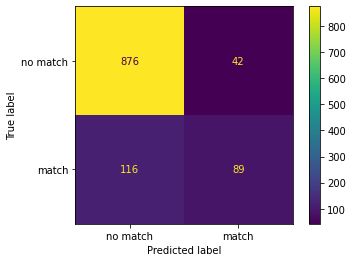

In [46]:
plot_confusion_matrix(
    model_sm_xgb, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

In [47]:
print(classification_report(y_test, model_sm_xgb.predict(X_test), target_names=['no match', 'match']))

              precision    recall  f1-score   support

    no match       0.88      0.95      0.92       918
       match       0.68      0.43      0.53       205

    accuracy                           0.86      1123
   macro avg       0.78      0.69      0.72      1123
weighted avg       0.85      0.86      0.85      1123



Feature engineering to construct a new dataset

In [71]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5614 entries, 0 to 8377
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         5614 non-null   object 
 1   age                            5614 non-null   float64
 2   age_o                          5614 non-null   float64
 3   race                           5614 non-null   object 
 4   race_o                         5614 non-null   object 
 5   importance_same_race           5614 non-null   float64
 6   importance_same_religion       5614 non-null   float64
 7   field                          5614 non-null   object 
 8   pref_o_attractive              5614 non-null   float64
 9   pref_o_sincere                 5614 non-null   float64
 10  pref_o_intelligence            5614 non-null   float64
 11  pref_o_funny                   5614 non-null   float64
 12  pref_o_ambitious               5614 non-null   f

In [218]:
def re_wrangle(df):
    # drop gender since it was deemed 'not important' in previous analysis
    df = df.drop(columns = ['gender'])
    # find difference in ages then drop actual ages
    df['age_diff'] = (df['age'] - df['age_o']).abs()
    df = df.drop(columns = ['age', 'age_o'])
    # find if they are the same race or not, then drop the actual races
    df['same_race'] = (df['race'] == df['race_o']).astype(int)
    df = df.drop(columns = ['race', 'race_o'])
    # drop 'importance same religion' since there's no measure if they are the same religion
    df = df.drop(columns = ['importance_same_religion'])
    # drop field since it is a one-sided information with high cardinality
    df = df.drop(columns = ['field'])
    # drop personal interests since they don't have similar variables about the partner
    df = df.drop(columns = ['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga'])
    # drop self-ratings since they are one-sided information
    df = df.drop(columns = ['attractive', 'sincere', 'intelligence', 'funny', 'ambition'])
    # delete abnormal funny_o values
    df = df[df['funny_o'] <= 10]

    df.columns = ['importance_same_race',
    'pref_o_attractive',
    'pref_o_sincere',
    'pref_o_intelligence',
    'pref_o_funny',
    'pref_o_ambitious',
    'pref_o_sharedinterests',
    'attractive_o',
    'sincere_o',
    'intelligence_o',
    'funny_o',
    'ambitious_o',
    'sharedinterests_o',
    'attractive_important',
    'sincere_important',
    'intelligence_important',
    'funny_important',
    'ambition_important',
    'sharedinterests_important',
    'attractive_partner',
    'sincere_partner',
    'intelligence_partner',
    'funny_partner',
    'ambition_partner',
    'sharedinterests_partner',
    'expected_happy_with_sd_people',
    'like',
    'guess_prob_liked',
    'met',
    'decision',
    'decision_other',
    'match',
    'age_diff',
    'same_race']
    

    return df

In [219]:
new_df = re_wrangle(general_df)
new_df.head()

,importance_same_race,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_sharedinterests,attractive_o,sincere_o,intelligence_o,funny_o,ambitious_o,sharedinterests_o,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,sharedinterests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sharedinterests_partner,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_other,match,age_diff,same_race
0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,3.0,7.0,6.0,0.0,1,0,0,6.0,0
1,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,3.0,7.0,5.0,1.0,1,0,0,1.0,0
3,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,3.0,7.0,6.0,0.0,1,1,1,2.0,0
4,2.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,3.0,6.0,6.0,0.0,1,1,1,3.0,0
5,2.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,7.0,8.0,8.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,4.0,9.0,7.0,4.0,6.0,4.0,3.0,6.0,5.0,0.0,0,1,0,4.0,0


In [221]:
scale_list = ['importance_same_race',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_sharedinterests',
 'attractive_o',
 'sincere_o',
 'intelligence_o',
 'funny_o',
 'ambitious_o',
 'sharedinterests_o',
 'attractive_important',
 'sincere_important',
 'intelligence_important',
 'funny_important',
 'ambition_important',
 'sharedinterests_important',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'sharedinterests_partner']
scale_df = new_df[scale_list]

In [222]:
scaler = MinMaxScaler(feature_range=(0,10))
scale_df = pd.DataFrame(data = scaler.fit_transform(scale_df), columns = scale_list, index = new_df.index)

In [223]:
new_df = new_df.drop(columns = scale_list)
new_df = pd.concat([new_df, scale_df], axis = 1)

In [151]:
# min_col = []
# max_col = []
# for col in scale_df.columns:
#     min_col.append(scale_df[col].min())
#     max_col.append(scale_df[col].max())
# range_df = pd.DataFrame(data = {'min': min_col, 'max': max_col}, index = scale_df.columns)
# range_df

In [224]:
def quality_score(x,y):
    df = pd.DataFrame(data = {x: new_df[x], y: new_df[y]})
    score = []
    for i in df.index:
        if df[x][i] < 4.0:
            score.append(df[y][i])
        elif (df[x][i] >= 4.0) & (df[x][i] < 7.0):
            if df[y][i] < 4.0:
                score.append(df[y][i] / 2)
            elif (df[y][i] >= 4.0) & (df[y][i] < 7.0):
                score.append(df[y][i])
            else:
                score.append(df[y][i] * 1.5)
        else:
            if df[y][i] < 4.0:
                score.append(df[y][i] / 4)
            elif (df[y][i] >= 4.0) & (df[y][i] < 7.0):
                score.append(df[y][i] * 2 / 3)
            else:
                score.append(df[y][i] * 2)
    return score

In [225]:
important = []
partner = []
for col in new_df.columns:
    if col.split('_')[-1] == 'important':
        important.append(col)
    elif col.split('_')[-1] == 'partner':
        partner.append(col)

for x in important:
    for y in partner:
        if x.split('_')[0] == y.split('_')[0]:
            new_df['rate_other_' + x.split('_')[0]] = quality_score(x,y)

In [226]:
pref = []
other_rate = []
for col in new_df.columns:
    if col.split('_')[0] == 'pref':
        pref.append(col)
    elif col.split('_')[-1] == 'o':
        other_rate.append(col)

for x in pref:
    for y in other_rate:
        if x.split('_')[-1] == y.split('_')[0]:
            new_df['rate_my_' + x.split('_')[-1]] = quality_score(x,y)

        

In [227]:
new_df

,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_other,match,age_diff,same_race,importance_same_race,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_sharedinterests,attractive_o,sincere_o,intelligence_o,funny_o,ambitious_o,sharedinterests_o,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,sharedinterests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sharedinterests_partner,rate_other_attractive,rate_other_sincere,rate_other_intelligence,rate_other_funny,rate_other_ambition,rate_other_sharedinterests,rate_my_attractive,rate_my_sincere,rate_my_intelligence,rate_my_funny,rate_my_ambitious,rate_my_sharedinterests
0,3.0,7.0,6.0,0.0,1,0,0,6.0,0,2.0,3.5,4.255319,4.0,4.0,0.000000,1.666667,6.0,8.0,8.0,8.0,8.0,6.0,1.5,4.255319,4.0,3.0,2.830189,5.0,6.0,9.0,7.0,7.0,6.0,5.0,6.00,13.5,10.5,7.0,6.0,5.0,6.0,12.0,12.0,12.0,8.0,6.0
1,3.0,7.0,5.0,1.0,1,0,0,1.0,0,2.0,6.0,0.000000,0.0,8.0,0.000000,0.000000,7.0,8.0,10.0,7.0,7.0,5.0,1.5,4.255319,4.0,3.0,2.830189,5.0,7.0,8.0,7.0,8.0,5.0,6.0,7.00,12.0,10.5,8.0,5.0,6.0,10.5,8.0,10.0,14.0,7.0,5.0
3,3.0,7.0,6.0,0.0,1,1,1,2.0,0,2.0,3.0,1.063830,3.0,8.0,0.943396,1.666667,7.0,8.0,9.0,8.0,9.0,8.0,1.5,4.255319,4.0,3.0,2.830189,5.0,7.0,6.0,8.0,7.0,6.0,8.0,7.00,6.0,12.0,7.0,6.0,12.0,7.0,8.0,9.0,16.0,9.0,8.0
4,3.0,6.0,6.0,0.0,1,1,1,3.0,0,2.0,3.0,2.127660,4.0,2.0,1.886792,6.666667,8.0,7.0,9.0,6.0,9.0,7.0,1.5,4.255319,4.0,3.0,2.830189,5.0,5.0,6.0,7.0,7.0,6.0,6.0,5.00,6.0,10.5,7.0,6.0,6.0,8.0,7.0,13.5,6.0,9.0,10.5
5,3.0,6.0,5.0,0.0,0,1,0,4.0,0,2.0,5.0,0.000000,6.0,2.0,0.000000,3.333333,7.0,7.0,8.0,8.0,7.0,7.0,1.5,4.255319,4.0,3.0,2.830189,5.0,4.0,9.0,7.0,4.0,6.0,4.0,4.00,13.5,10.5,4.0,6.0,4.0,10.5,7.0,12.0,8.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,10.0,5.0,5.0,0.0,0,0,0,3.0,0,1.0,2.5,3.191489,5.0,3.0,1.886792,3.333333,6.0,6.0,6.0,6.0,6.0,6.0,7.0,0.000000,3.0,3.0,0.000000,0.0,2.0,7.0,6.0,6.0,6.0,7.0,0.50,7.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0
8368,10.0,4.0,5.0,0.0,0,1,0,1.0,1,1.0,1.0,6.382979,4.0,3.0,2.830189,3.333333,9.0,7.0,7.0,8.0,8.0,6.0,7.0,0.000000,3.0,3.0,0.000000,0.0,3.0,4.0,6.0,4.0,4.0,4.0,0.75,4.0,6.0,4.0,4.0,4.0,9.0,10.5,10.5,8.0,8.0,6.0
8369,10.0,6.0,3.0,0.0,0,1,0,3.0,1,1.0,1.0,4.255319,3.0,4.0,2.830189,6.666667,8.0,9.0,9.0,7.0,6.0,7.0,7.0,0.000000,3.0,3.0,0.000000,0.0,3.0,3.0,9.0,6.0,9.0,6.0,0.75,3.0,9.0,6.0,9.0,6.0,8.0,13.5,9.0,10.5,6.0,10.5
8370,10.0,6.0,6.0,0.0,0,1,0,2.0,0,1.0,1.0,5.319149,4.0,4.0,0.943396,6.666667,7.0,2.0,6.0,5.0,8.0,3.0,7.0,0.000000,3.0,3.0,0.000000,0.0,2.0,7.0,9.0,8.0,7.0,8.0,0.50,7.0,9.0,8.0,7.0,8.0,7.0,1.0,6.0,5.0,8.0,1.5


In [ ]:
#drop variables used to generate the new columns
new_df = new_df.drop(columns = important + partner + pref + other_rate)

In [236]:
new_df.loc[new_df['importance_same_race'] < 4, 'race_score'] = new_df['importance_same_race'] + 3
new_df.loc[(new_df['importance_same_race'] >= 4) & (new_df['importance_same_race'] <= 7) & (new_df['same_race'] == 0), 'race_score'] = new_df['importance_same_race'] * 0.75
new_df.loc[(new_df['importance_same_race'] >= 4) & (new_df['importance_same_race'] <= 7) & (new_df['same_race'] == 1), 'race_score'] = new_df['importance_same_race'] * 1.25
new_df.loc[(new_df['importance_same_race'] > 7) & (new_df['importance_same_race'] < 10) & (new_df['same_race'] == 0), 'race_score'] = new_df['importance_same_race'] * 0.25
new_df.loc[(new_df['importance_same_race'] == 10.0) & (new_df['same_race'] == 0), 'race_score'] = 0
new_df.loc[(new_df['importance_same_race'] > 7) & (new_df['same_race'] == 1), 'race_score'] = new_df['importance_same_race'] * 2

In [238]:
#drop the variables used to generate race score
new_df = new_df.drop(columns = ['importance_same_race', 'same_race'])

In [239]:
new_df.head()

,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_other,match,age_diff,rate_other_attractive,rate_other_sincere,rate_other_intelligence,rate_other_funny,rate_other_ambition,rate_other_sharedinterests,rate_my_attractive,rate_my_sincere,rate_my_intelligence,rate_my_funny,rate_my_ambitious,rate_my_sharedinterests,race_score
0,3.0,7.0,6.0,0.0,1,0,0,6.0,6.0,13.5,10.5,7.0,6.0,5.0,6.0,12.0,12.0,12.0,8.0,6.0,5.0
1,3.0,7.0,5.0,1.0,1,0,0,1.0,7.0,12.0,10.5,8.0,5.0,6.0,10.5,8.0,10.0,14.0,7.0,5.0,5.0
3,3.0,7.0,6.0,0.0,1,1,1,2.0,7.0,6.0,12.0,7.0,6.0,12.0,7.0,8.0,9.0,16.0,9.0,8.0,5.0
4,3.0,6.0,6.0,0.0,1,1,1,3.0,5.0,6.0,10.5,7.0,6.0,6.0,8.0,7.0,13.5,6.0,9.0,10.5,5.0
5,3.0,6.0,5.0,0.0,0,1,0,4.0,4.0,13.5,10.5,4.0,6.0,4.0,10.5,7.0,12.0,8.0,7.0,7.0,5.0


# Use logistic regression, random forest classification and XGBoost classification on the re-engineered dataset

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [241]:
# data split to predict 'match'
X = new_df.drop(columns = ['decision', 'decision_other', 'match'])
y = new_df['match']

## predictive models without re-sampleing

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [244]:
model_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression(
        random_state=42, 
        n_jobs = -1
    )
).fit(X_train, y_train);

In [245]:
model_rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=25, n_jobs = -1).fit(X_train, y_train);

In [252]:
model_xgb = XGBClassifier(random_state = 42, n_jobs = -1).fit(X_train, y_train);

[19:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [253]:
print('logistic regression test accuracy:', model_lr.score(X_test, y_test))
print('Random Forest test accuracy:', model_rf.score(X_test, y_test))
print('XGBoosting test accuracy:', model_xgb.score(X_test, y_test))

logistic regression test accuracy: 0.8432769367764915
Random Forest test accuracy: 0.8495102404274265
XGBoosting test accuracy: 0.8504007123775601


              precision    recall  f1-score   support

    no match       0.86      0.96      0.91       918
       match       0.65      0.30      0.41       205

    accuracy                           0.84      1123
   macro avg       0.76      0.63      0.66      1123
weighted avg       0.82      0.84      0.82      1123



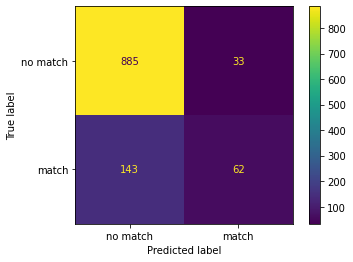

In [248]:
# logistic regression performance:
plot_confusion_matrix(
    model_lr, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

print(classification_report(y_test, model_lr.predict(X_test), target_names=['no match', 'match']))

              precision    recall  f1-score   support

    no match       0.86      0.98      0.91       918
       match       0.72      0.28      0.41       205

    accuracy                           0.85      1123
   macro avg       0.79      0.63      0.66      1123
weighted avg       0.83      0.85      0.82      1123



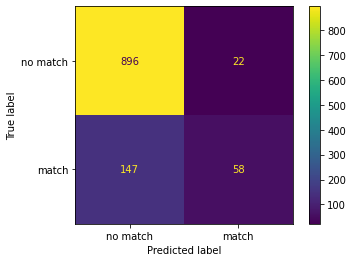

In [249]:
#random forest performance:
plot_confusion_matrix(
    model_rf, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

print(classification_report(y_test, model_rf.predict(X_test), target_names=['no match', 'match']))

              precision    recall  f1-score   support

    no match       0.88      0.95      0.91       918
       match       0.65      0.39      0.49       205

    accuracy                           0.85      1123
   macro avg       0.76      0.67      0.70      1123
weighted avg       0.83      0.85      0.83      1123



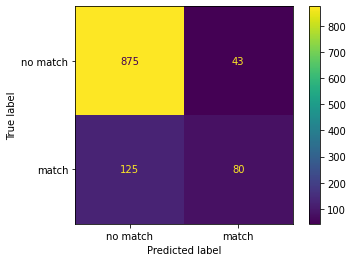

In [254]:
# XGBoosting performance:
plot_confusion_matrix(
    model_xgb, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

print(classification_report(y_test, model_xgb.predict(X_test), target_names=['no match', 'match']))

In case of no re-sampling, XGBoosting method performed the best by having the highest f1-score overall.

## With over_sampling

In [251]:
# over-sampling with SMOTE
sm = SMOTE(random_state = 42)
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)

# y_sm_train.value_counts()


0    3703
1    3703
Name: match, dtype: int64

In [257]:
model_sm_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression(
        random_state=42, 
        n_jobs = -1
    )
).fit(X_sm_train, y_sm_train);
print('Logistic Regression with SMOTE:', model_sm_lr.score(X_test, y_test))

Logistic Regression with SMOTE: 0.767586821015138


              precision    recall  f1-score   support

    no match       0.94      0.76      0.84       918
       match       0.43      0.79      0.55       205

    accuracy                           0.77      1123
   macro avg       0.68      0.77      0.70      1123
weighted avg       0.85      0.77      0.79      1123



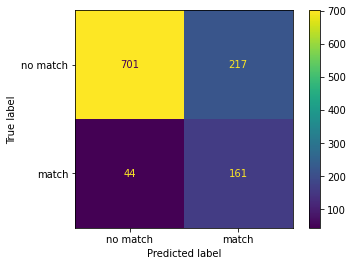

In [258]:
# Logistic regression performance:
plot_confusion_matrix(
    model_sm_lr, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

print(classification_report(y_test, model_sm_lr.predict(X_test), target_names=['no match', 'match']))

In [255]:
model_sm_xgb = XGBClassifier(n_jobs = -1, random_state = 42).fit(X_sm_train, y_sm_train);
print('XGBoosting with SMOTE:', model_sm_xgb.score(X_test, y_test))

[19:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoosting with SMOTE: 0.8423864648263579


              precision    recall  f1-score   support

    no match       0.88      0.94      0.91       918
       match       0.60      0.41      0.49       205

    accuracy                           0.84      1123
   macro avg       0.74      0.68      0.70      1123
weighted avg       0.83      0.84      0.83      1123



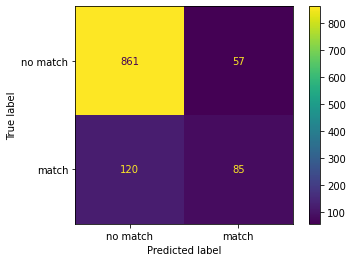

In [256]:
# XGBoosting performance:
plot_confusion_matrix(
    model_sm_xgb, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

print(classification_report(y_test, model_sm_xgb.predict(X_test), target_names=['no match', 'match']))

## With under-sampling

In [268]:
# manually undersample df to balance the classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = 42)
train = pd.concat([X_train, y_train],axis = 1)
# train['match'].value_counts()
undersample_0 = train[train['match'] == 0].sample(880)
undersample_1 = train[train['match'] == 1]
train_under = pd.concat([undersample_0, undersample_1], axis = 0)
# y_test.value_counts()
X_under_train = train_under.drop(columns = ['match'])
y_under_train = train_under['match']

In [270]:
# Logistics Regression: 

model_under_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression(
        random_state=42, 
        n_jobs = -1
    )
).fit(X_under_train, y_under_train);
print('Logistic Regression with under-sampling:', model_under_lr.score(X_test, y_test))

Logistic Regression with under-sampling: 0.7596439169139466


              precision    recall  f1-score   support

    no match       0.94      0.75      0.84       555
       match       0.41      0.78      0.53       119

    accuracy                           0.76       674
   macro avg       0.67      0.77      0.69       674
weighted avg       0.85      0.76      0.78       674



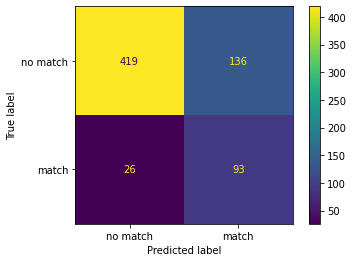

In [271]:
# Logistic regression performance:
plot_confusion_matrix(
    model_under_lr, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

print(classification_report(y_test, model_under_lr.predict(X_test), target_names=['no match', 'match']))

In [273]:
# XGBoosting:

model_under_xgb = XGBClassifier(n_jobs = -1, random_state = 42).fit(X_under_train, y_under_train);
print('XGBoosting accuracy with under-sampling:', model_under_xgb.score(X_test, y_test))

[19:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoosting accuracy with under-sampling: 0.7492581602373887


              precision    recall  f1-score   support

    no match       0.95      0.74      0.83       555
       match       0.40      0.81      0.53       119

    accuracy                           0.75       674
   macro avg       0.67      0.77      0.68       674
weighted avg       0.85      0.75      0.78       674



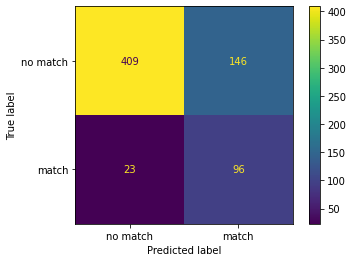

In [274]:
# XGBoosting performance:
plot_confusion_matrix(
    model_under_xgb, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

print(classification_report(y_test, model_under_xgb.predict(X_test), target_names=['no match', 'match']))

XGBoosting model and logistic regression showed similar results and they both improved compared to the models trained on imblalanced data. But the improvement was not significant.
<br>However, under-sampling improved recall by almost 100% compared to over-sampling with SMOTE. In this speed-dating prediction example, having a higher recall without giving up too much f1-score makes the model more reasonable, because people would rather use this application to find true potential dates with a bit more tries than having a potential date in the pool but always be determined as not a match by the system. 

Text(0.5, 1.0, 'most important features')

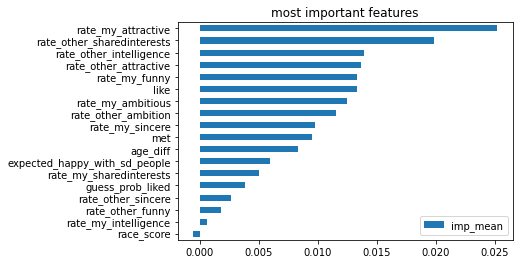

In [358]:
perm_imp = permutation_importance(
    model_under_xgb, 
    X_test, 
    y_test, 
    n_jobs = -1, 
    random_state=42
)
imps = pd.DataFrame(data = {'imp_mean': perm_imp['importances_mean']}, index = X_test.columns)
imps.sort_values(by = 'imp_mean').tail(18).plot(kind = 'barh')
plt.title('most important features')

## determine decisions separately using XGBoost

In [275]:
new_df.head()

,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_other,match,age_diff,rate_other_attractive,rate_other_sincere,rate_other_intelligence,rate_other_funny,rate_other_ambition,rate_other_sharedinterests,rate_my_attractive,rate_my_sincere,rate_my_intelligence,rate_my_funny,rate_my_ambitious,rate_my_sharedinterests,race_score
0,3.0,7.0,6.0,0.0,1,0,0,6.0,6.0,13.5,10.5,7.0,6.0,5.0,6.0,12.0,12.0,12.0,8.0,6.0,5.0
1,3.0,7.0,5.0,1.0,1,0,0,1.0,7.0,12.0,10.5,8.0,5.0,6.0,10.5,8.0,10.0,14.0,7.0,5.0,5.0
3,3.0,7.0,6.0,0.0,1,1,1,2.0,7.0,6.0,12.0,7.0,6.0,12.0,7.0,8.0,9.0,16.0,9.0,8.0,5.0
4,3.0,6.0,6.0,0.0,1,1,1,3.0,5.0,6.0,10.5,7.0,6.0,6.0,8.0,7.0,13.5,6.0,9.0,10.5,5.0
5,3.0,6.0,5.0,0.0,0,1,0,4.0,4.0,13.5,10.5,4.0,6.0,4.0,10.5,7.0,12.0,8.0,7.0,7.0,5.0


In [277]:
my_list = ['expected_happy_with_sd_people', 'like', 'guess_prob_liked', 'met', 'age_diff', 'rate_other_attractive','rate_other_sincere','rate_other_intelligence', 'rate_other_funny', 'rate_other_ambition', 'rate_other_sharedinterests', 'race_score','decision']
partner_list = ['guess_prob_liked', 'met', 'age_diff','rate_my_attractive','rate_my_sincere','rate_my_intelligence', 'rate_my_funny', 'rate_my_ambitious', 'rate_my_sharedinterests', 'decision_other']
my_df = new_df[my_list]
partner_df = new_df[partner_list]


[20:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------------------------------------------------------------------------------
mydecision baseline: 0.5608409050418671
my decision test accuracy: 0.7773820124666073
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       618
           1       0.77      0.72      0.74       505

    accuracy                           0.78      1123
   macro avg       0.78      0.77      0.77      1123
weighted avg       0.78      0.78      0.78      1123

--------------------------------------------------------------------------------


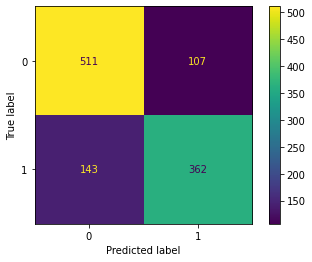

In [286]:
X_my = my_df.drop(columns = ['decision'])
y_my = my_df['decision']

X_my_train, X_my_test, y_my_train, y_my_test = train_test_split(X_my, y_my, test_size = 0.2, random_state = 42)
model_my_xgb = XGBClassifier(n_jobs = -1, random_state = 42).fit(X_my_train, y_my_train);
print('--------------------------------------------------------------------------------')
print('mydecision baseline:', my_df['decision'].value_counts(normalize = True).max())
print('my decision test accuracy:', model_my_xgb.score(X_my_test, y_my_test))
print('--------------------------------------------------------------------------------')
print(classification_report(y_my_test, model_my_xgb.predict(X_my_test)))
print('--------------------------------------------------------------------------------')
plot_confusion_matrix(
    model_my_xgb, 
    X_my_test, 
    y_my_test
);

[20:56:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------------------------------------------------------------------------------
partner decision baseline: 0.5626224835203991
my decision test accuracy: 0.7604630454140695
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       625
           1       0.74      0.70      0.72       498

    accuracy                           0.76      1123
   macro avg       0.76      0.75      0.76      1123
weighted avg       0.76      0.76      0.76      1123

--------------------------------------------------------------------------------


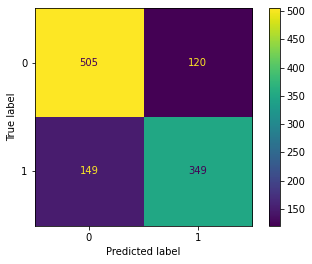

In [287]:
X_p = partner_df.drop(columns = ['decision_other'])
y_p = partner_df['decision_other']

X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, y_p, test_size = 0.2, random_state = 42)
model_p_xgb = XGBClassifier(n_jobs = -1, random_state = 42).fit(X_p_train, y_p_train);
print('--------------------------------------------------------------------------------')
print('partner decision baseline:', partner_df['decision_other'].value_counts(normalize = True).max())
print('my decision test accuracy:', model_p_xgb.score(X_p_test, y_p_test))
print('--------------------------------------------------------------------------------')
print(classification_report(y_p_test, model_p_xgb.predict(X_p_test)))
print('--------------------------------------------------------------------------------')
plot_confusion_matrix(
    model_p_xgb, 
    X_p_test, 
    y_p_test
);

# Hyperparameter tuning

In [300]:
import sklearn.model_selection as ms

In [310]:
# data split to predict 'match'
X = new_df.drop(columns = ['decision', 'decision_other', 'match'])
y = new_df['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = 42)
train = pd.concat([X_train, y_train],axis = 1)

undersample_0 = train[train['match'] == 0].sample(880)
undersample_1 = train[train['match'] == 1]
train_under = pd.concat([undersample_0, undersample_1], axis = 0)

X_under_train = train_under.drop(columns = ['match'])
y_under_train = train_under['match']

In [302]:
clf_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression()
)

In [303]:
clf_xgb = XGBClassifier()

In [305]:
clf_lr.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [328]:
param_grid = {
    'logisticregression__penalty': ['l1','l2'], 
    'logisticregression__C': np.logspace(-4, 4, 20), 
    'logisticregression__solver': ['liblinear']
}

In [329]:
final_model_lr = ms.GridSearchCV(clf_lr, 
                              param_grid= param_grid, 
                              n_jobs = -1,
                              cv = 5,
                              verbose = 1)
final_model_lr.fit(X_under_train,y_under_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear']},
             verbose=1)

In [332]:
best_score_lr = final_model_lr.best_score_
best_params_lr = final_model_lr.best_params_
print('logistic regression best score:', best_score_lr)
print('Best params for logistic regression model:', best_params_lr)

logistic regression best score: 0.7644493284493284
Best params for logistic regression model: {'logisticregression__C': 0.08858667904100823, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


              precision    recall  f1-score   support

    no match       0.94      0.73      0.83       555
       match       0.39      0.80      0.52       119

    accuracy                           0.74       674
   macro avg       0.67      0.77      0.68       674
weighted avg       0.85      0.74      0.77       674



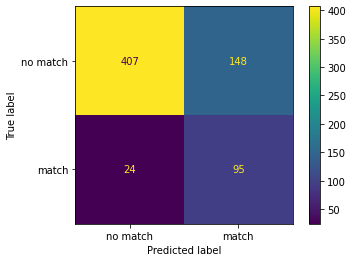

In [331]:
# Logistic regression performance:
plot_confusion_matrix(
    final_model_lr, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

print(classification_report(y_test, final_model_lr.predict(X_test), target_names=['no match', 'match']))

In [354]:
# XGBoosting
param_grid_xgb = {
    'eta': np.linspace(0.08, 0.1, 5), 
    'max_depth': range(2,4), 
    'gamma': np.linspace(0.0, 0.1, 4), 
    'grow_policy': ['depthwise','lossguide']
}
scoring = {'AUC': 'roc_auc', 'f1': 'f1'}

In [361]:
final_model_xgb = ms.GridSearchCV(XGBClassifier(), 
                              param_grid= param_grid_xgb, 
                              n_jobs = -1,
                              cv = 5,
                              scoring = scoring, 
                              refit = 'AUC', 
                              verbose = 1)
final_model_xgb.fit(X_under_train,y_under_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[23:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

XGBoost best score: 0.8410243319898493
Best params for XGBosst model: {'eta': 0.095, 'gamma': 0.0, 'grow_policy': 'depthwise', 'max_depth': 2}
--------------------------------------------------------------
              precision    recall  f1-score   support

    no match       0.95      0.72      0.82       555
       match       0.38      0.81      0.52       119

    accuracy                           0.74       674
   macro avg       0.66      0.76      0.67       674
weighted avg       0.85      0.74      0.77       674



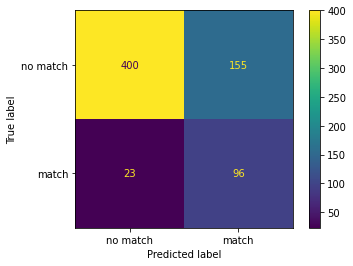

In [362]:
best_score_xgb = final_model_xgb.best_score_
best_params_xgb = final_model_xgb.best_params_
print('XGBoost best score:', best_score_xgb)
print('Best params for XGBosst model:', best_params_xgb)
print('--------------------------------------------------------------')
print(classification_report(y_test, final_model_xgb.predict(X_test), target_names=['no match', 'match']))
plot_confusion_matrix(
    final_model_xgb, 
    X_test, 
    y_test, 
    display_labels=['no match', 'match']
);

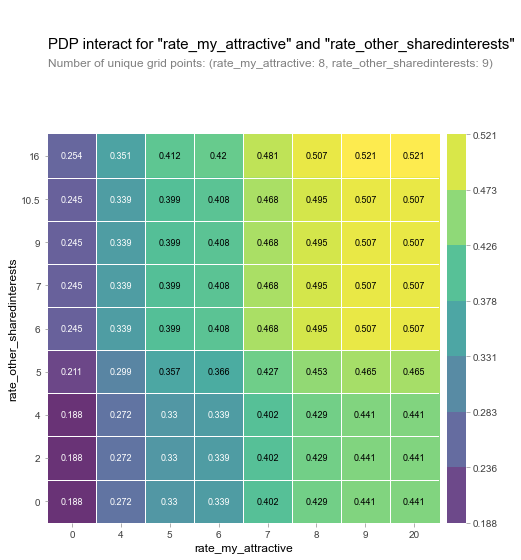

In [363]:
features = ['rate_my_attractive', 'rate_other_sharedinterests']

interact = pdp_interact(final_model_xgb, 
                        dataset=X_test, 
                        model_features=X_test.columns, 
                        features=features)

pdp_interact_plot(interact, plot_type='grid', feature_names=features);